In [1]:
import pandas as pd
import requests
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
x = requests.get('https://api.covidtracking.com/v1/us/daily.csv')

In [3]:
data_state = pd.read_csv('https://api.covidtracking.com/v1/states/ca/daily.csv')

In [4]:
death = pd.DataFrame(data_state['deathIncrease'])
date = pd.DataFrame(data_state['date'])
death.size

369

In [5]:
def get_average_new_deaths(state_name):
    data_state = pd.read_csv('https://api.covidtracking.com/v1/states/' + state_name +'/daily.csv')
    death = pd.DataFrame(data_state['positiveIncrease'])
    days = []
    for i in range(death.size, 0, -1):
        days.append(i)

    death.insert(0, 'days', days)
    average_sum = 0
    for i in range(0, death['positiveIncrease'].size):
        average_sum += death['positiveIncrease'][i];
    
    return (average_sum/death['positiveIncrease'].size)
    

In [6]:

days = []
for i in range(death.size, 0, -1):
    days.append(i)

death.insert(0, 'days', days)

<AxesSubplot:xlabel='days', ylabel='deathIncrease'>

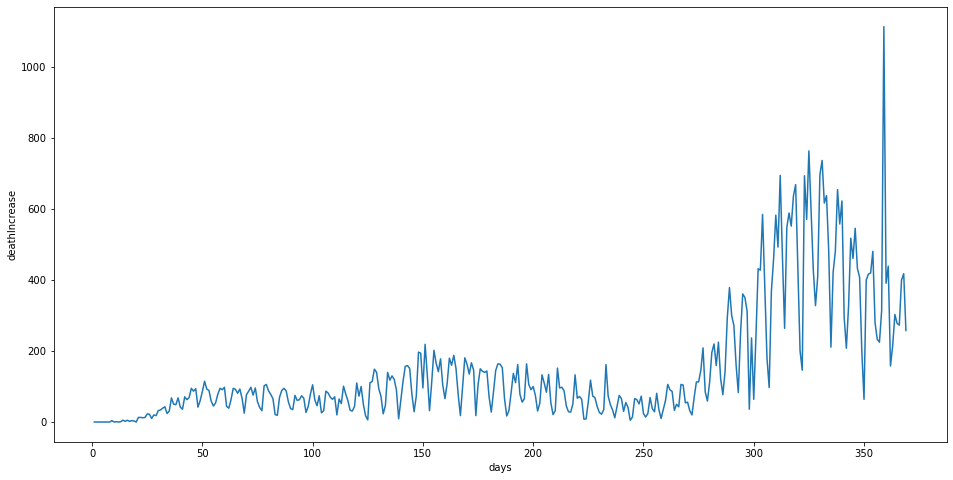

In [7]:
f = plt.figure(figsize=(16,8))
sb.lineplot(data = death, x ='days', y ='deathIncrease')

In [8]:
death['deathIncrease'].size
average_sum = 0
for i in range(0, death['deathIncrease'].size):
    average_sum += death['deathIncrease'][i];
    
print(average_sum/death.size)

73.33875338753387


In [9]:
state_names = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')

In [10]:
state_names = state_names[0]

In [11]:
state_names = state_names.iloc[:,[0,1]]

In [12]:
state_names = state_names['Flag, name andpostal abbreviation[12]']

In [13]:
state_names = state_names.set_index('Flag, name andpostal abbreviation[12]')

In [14]:
state_names = state_names.to_dict()['Flag, name andpostal abbreviation[12].1']

In [15]:
removal_list = []
for key,value in state_names.items():
    state_names[key] = value.lower()
    if(key[-1] == ']'):
        removal_list.append(key)
        

In [16]:
for i in removal_list:
    value = state_names[i]
    state_names.pop(i)
    state_names[i[:-3]] = value

In [17]:
state_names

{'Alabama': 'al',
 'Alaska': 'ak',
 'Arizona': 'az',
 'Arkansas': 'ar',
 'California': 'ca',
 'Colorado': 'co',
 'Connecticut': 'ct',
 'Delaware': 'de',
 'Florida': 'fl',
 'Georgia': 'ga',
 'Hawaii': 'hi',
 'Idaho': 'id',
 'Illinois': 'il',
 'Indiana': 'in',
 'Iowa': 'ia',
 'Kansas': 'ks',
 'Louisiana': 'la',
 'Maine': 'me',
 'Maryland': 'md',
 'Michigan': 'mi',
 'Minnesota': 'mn',
 'Mississippi': 'ms',
 'Missouri': 'mo',
 'Montana': 'mt',
 'Nebraska': 'ne',
 'Nevada': 'nv',
 'New Hampshire': 'nh',
 'New Jersey': 'nj',
 'New Mexico': 'nm',
 'New York': 'ny',
 'North Carolina': 'nc',
 'North Dakota': 'nd',
 'Ohio': 'oh',
 'Oklahoma': 'ok',
 'Oregon': 'or',
 'Rhode Island': 'ri',
 'South Carolina': 'sc',
 'South Dakota': 'sd',
 'Tennessee': 'tn',
 'Texas': 'tx',
 'Utah': 'ut',
 'Vermont': 'vt',
 'Washington': 'wa',
 'West Virginia': 'wv',
 'Wisconsin': 'wi',
 'Wyoming': 'wy',
 'Kentucky': 'ky',
 'Massachusetts': 'ma',
 'Pennsylvania': 'pa',
 'Virginia': 'va'}

In [18]:
get_average_new_deaths(state_names['Alabama'])

1365.6256830601094

In [19]:
average_death_dict = {}
for name in state_names.keys():
    average_deaths = get_average_new_deaths(state_names[name])
    average_death_dict[name] = average_deaths
    print(name)
    
    

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Louisiana
Maine
Maryland
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Washington
West Virginia
Wisconsin
Wyoming
Kentucky
Massachusetts
Pennsylvania
Virginia


In [20]:
population_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population')

In [21]:
population_data = population_data[0]

In [22]:
population_data = population_data.iloc[:,[2,3]]

In [23]:
population_data = list(population_data.set_index('State or territory').to_dict().values())[0]


In [24]:
for i in average_death_dict.keys():
    average_death_dict[i] = int(average_death_dict[i])/int(population_data[(i,)])

In [25]:
for i in average_death_dict.keys():
    average_death_dict[i] = average_death_dict[i]*1000000

In [26]:
average_death_dict

{'Alabama': 277.3526617321598,
 'Alaska': 211.99248315685531,
 'Arizona': 301.69505730791263,
 'Arkansas': 292.0288979918311,
 'California': 241.00744770928367,
 'Colorado': 203.6944280534234,
 'Connecticut': 214.78738017310064,
 'Delaware': 243.20815882303467,
 'Florida': 217.40818886693384,
 'Georgia': 258.9164891148165,
 'Hawaii': 54.72613478549488,
 'Idaho': 258.3593197924586,
 'Illinois': 257.95370497627414,
 'Indiana': 263.3623061478,
 'Iowa': 243.08050326831062,
 'Kansas': 276.61425524357327,
 'Louisiana': 255.09556073448576,
 'Maine': 92.58292282065354,
 'Maryland': 173.71770080990098,
 'Michigan': 176.89161400303314,
 'Minnesota': 235.9765416338627,
 'Mississippi': 274.03392088273307,
 'Missouri': 213.44220999332202,
 'Montana': 254.4936640331971,
 'Nebraska': 270.4443545257108,
 'Nevada': 256.19300382791863,
 'New Hampshire': 152.2387513494721,
 'New Jersey': 233.2710489125032,
 'New Mexico': 240.70428078557902,
 'New York': 234.32034378429992,
 'North Carolina': 222.90722144

# Uni-Variate Data for Diversity Index

In [27]:
state_data = pd.DataFrame.from_dict(average_death_dict, orient='index')
race_data = pd.read_csv('Ethnicity Data.csv')
race_data

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total,Diversity by Simpson Index
0,United States,0.601,0.122,0.185,0.056,0.007,0.002,0.028,1,0.414283
1,Alabama,0.654,0.265,0.044,0.014,0.004,NaN,0.019,1,0.500450
2,Alaska,0.600,0.022,0.070,0.060,0.151,0.015,0.083,1,0.398899
3,Arizona,0.542,0.043,0.318,0.033,0.039,0.002,0.024,1,0.399927
4,Arkansas,0.721,0.152,0.078,0.016,0.006,0.004,0.024,1,0.549913
5,California,0.364,0.053,0.395,0.147,0.004,0.004,0.033,1,0.314060
6,Colorado,0.678,0.038,0.218,0.032,0.005,0.001,0.028,1,0.510486
7,Connecticut,0.657,0.100,0.169,0.046,0.002,NaN,0.026,1,0.473006
8,Delaware,0.614,0.218,0.097,0.039,0.003,NaN,0.028,1,0.436243
9,District of Columbia,0.367,0.450,0.112,0.037,0.003,NaN,0.031,1,0.352072


In [28]:
race_data = race_data.set_index('Location')

In [29]:
race_data = race_data.iloc[:,[8]]

In [30]:
race_data

,Diversity by Simpson Index
Location,
United States,0.414283
Alabama,0.500450
Alaska,0.398899
Arizona,0.399927
Arkansas,0.549913
California,0.314060
Colorado,0.510486
Connecticut,0.473006
Delaware,0.436243


In [31]:
combined_race_data = state_data.merge(race_data, left_index = True, right_index = True)
combined_race_data = combined_race_data.rename(columns={0:'deaths'})
combined_race_data

,deaths,Diversity by Simpson Index
Alabama,277.352662,0.500450
Alaska,211.992483,0.398899
Arizona,301.695057,0.399927
Arkansas,292.028898,0.549913
California,241.007448,0.314060
Colorado,203.694428,0.510486
Connecticut,214.787380,0.473006
Delaware,243.208159,0.436243
Florida,217.408189,0.375466
Georgia,258.916489,0.380284


<AxesSubplot:xlabel='Diversity by Simpson Index', ylabel='deaths'>

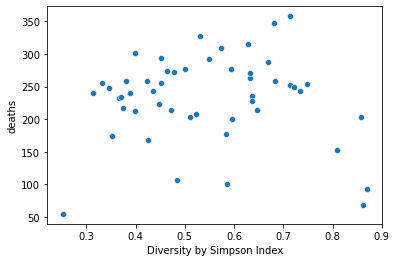

In [32]:
sb.scatterplot(data=combined_race_data,x = 'Diversity by Simpson Index' ,y = 'deaths')

In [33]:
combined_race_data.corr()

,deaths,Diversity by Simpson Index
deaths,1.000000,-0.042238
Diversity by Simpson Index,-0.042238,1.000000


Intercept of Regression 	: b =  [178.63423205]
Coefficients of Regression 	: a =  [[113.5337387]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06922134233829602
Mean Squared Error (MSE) 	: 3150.9544248460425

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.3899608473670908
Mean Squared Error (MSE) 	: 9221.166641697664



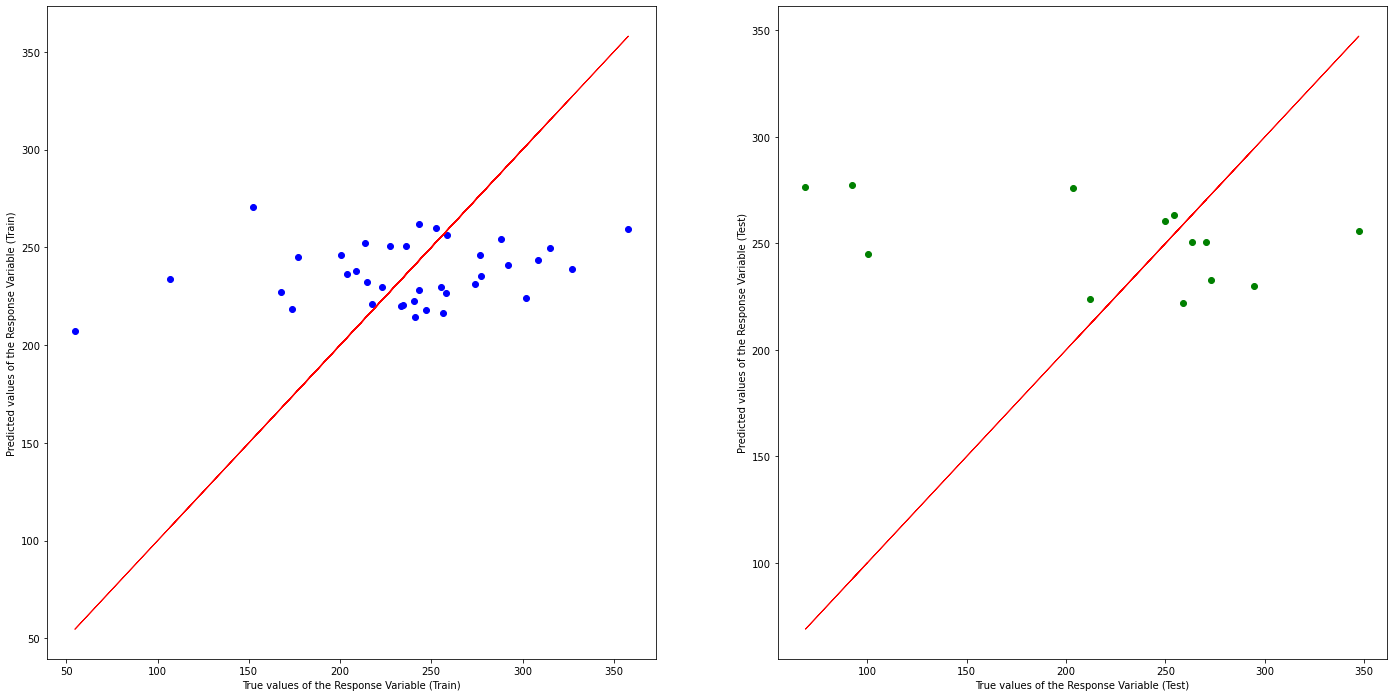

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Race = pd.DataFrame(combined_race_data['Diversity by Simpson Index']) 
Deaths = pd.DataFrame(combined_race_data['deaths']) 

X_train, X_test, y_train, y_test = train_test_split(Race,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

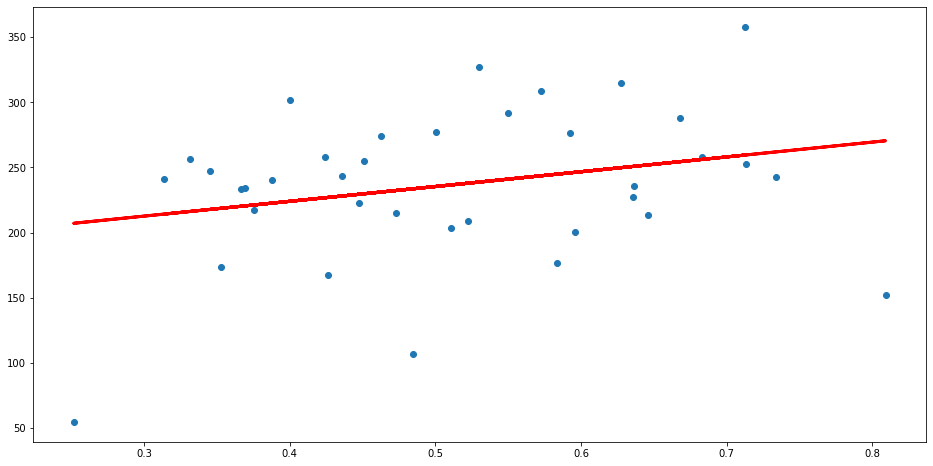

In [35]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate for % of Smokers per State

In [36]:
tobacco_data = pd.read_csv('Cigarette_use_USA.csv')
tobacco_data

,Location,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,Alabama,19.2,17.9,20.5,"6,347"
1,Alaska,19.1,16.9,21.3,"2,698"
2,Arizona,14.0,12.7,15.3,"7,758"
3,Arkansas,22.7,20.9,24.5,"5,177"
4,California,11.2,10.4,12.0,"11,118"
5,Colorado,14.5,13.6,15.4,"8,188"
6,Connecticut,12.2,11.3,13.1,"10,276"
7,Delaware,16.5,15.1,17.9,"5,011"
8,Florida,14.5,13.4,15.6,"14,589"
9,Georgia,16.1,15.1,17.1,"8,783"


In [37]:
tobacco_data = tobacco_data.set_index('Location')
tobacco_data = tobacco_data.iloc[:,[0]]
tobacco_data

,Data_Value
Location,
Alabama,19.2
Alaska,19.1
Arizona,14.0
Arkansas,22.7
California,11.2
Colorado,14.5
Connecticut,12.2
Delaware,16.5
Florida,14.5


In [38]:
combined_tobacco_data = state_data.merge(tobacco_data, left_index = True, right_index = True)
combined_tobacco_data = combined_tobacco_data.rename(columns={0:'Deaths'})
combined_tobacco_data

,Deaths,Data_Value
Alabama,277.352662,19.2
Alaska,211.992483,19.1
Arizona,301.695057,14.0
Arkansas,292.028898,22.7
California,241.007448,11.2
Colorado,203.694428,14.5
Connecticut,214.787380,12.2
Delaware,243.208159,16.5
Florida,217.408189,14.5
Georgia,258.916489,16.1


<AxesSubplot:xlabel='Data_Value', ylabel='Deaths'>

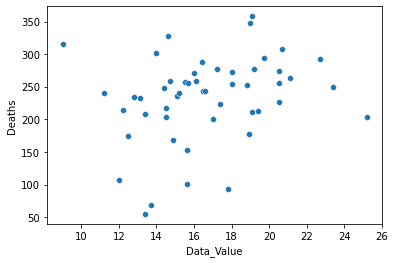

In [39]:
sb.scatterplot(data=combined_tobacco_data,x = 'Data_Value' ,y = 'Deaths')

In [40]:
combined_tobacco_data.corr()

,Deaths,Data_Value
Deaths,1.000000,0.254479
Data_Value,0.254479,1.000000


Intercept of Regression 	: b =  [147.81379866]
Coefficients of Regression 	: a =  [[5.41831376]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.08734333294004215
Mean Squared Error (MSE) 	: 3121.107606630174

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.007070750272935689
Mean Squared Error (MSE) 	: 6581.502618669925



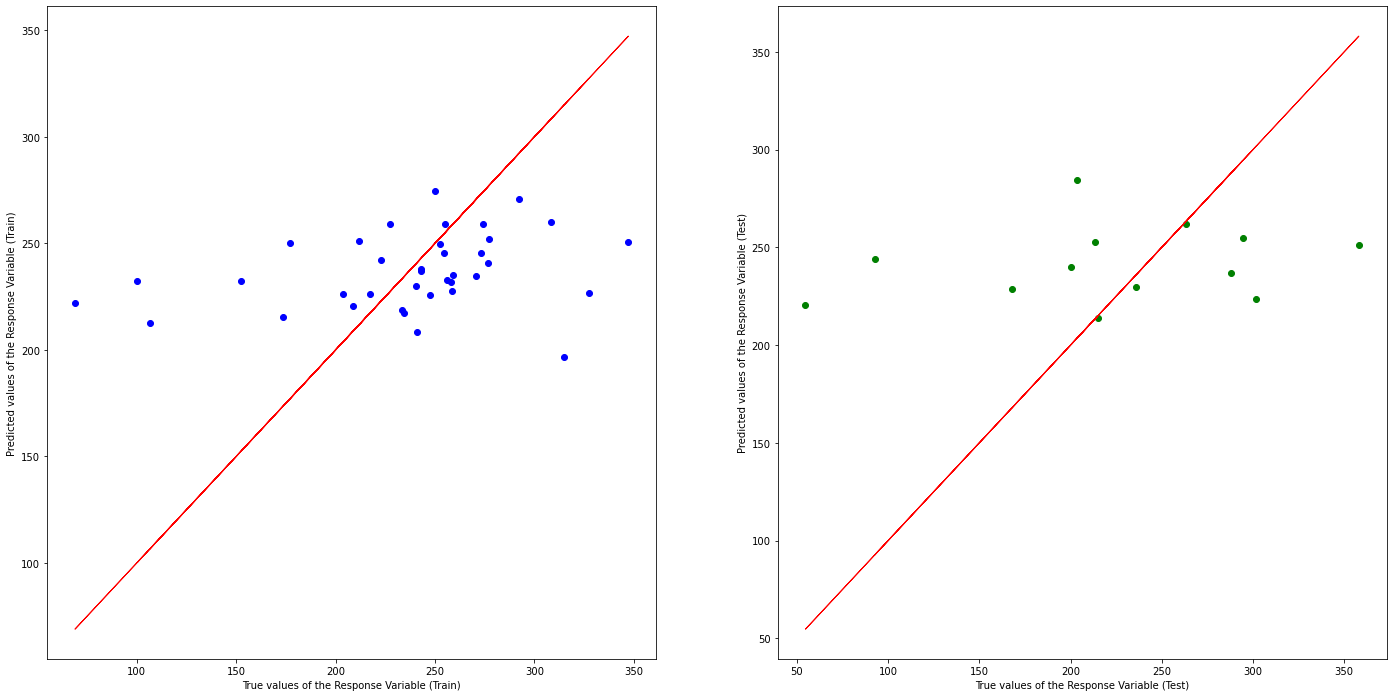

In [41]:
Data_Value = pd.DataFrame(combined_tobacco_data['Data_Value'])   # Response
Deaths = pd.DataFrame(combined_tobacco_data['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(Data_Value,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

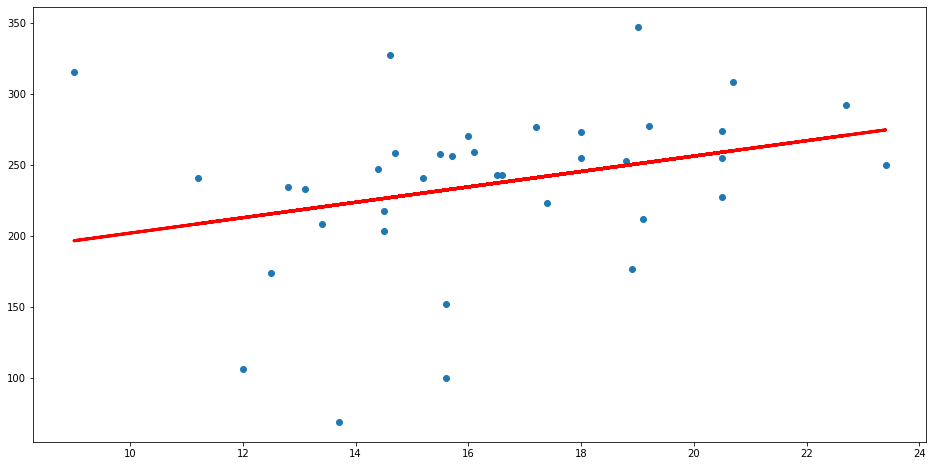

In [42]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Average Temperature per State per Year

In [43]:
data_temp = pd.read_csv("American Temp.csv")
data_temp = data_temp.set_index('Location')
data_temp 

,Ferenheit
Location,
Alabama,62.8
Alaska,26.6
Arizona,60.3
Arkansas,60.4
California,59.4
Colorado,45.1
Connecticut,49.0
Delaware,55.3
Florida,70.7


In [44]:
combined_data_temp = state_data.merge(data_temp, left_index = True, right_index = True)
combined_data_temp = combined_data_temp.rename(columns={0:'Deaths'})
combined_data_temp

,Deaths,Ferenheit
Alabama,277.352662,62.8
Alaska,211.992483,26.6
Arizona,301.695057,60.3
Arkansas,292.028898,60.4
California,241.007448,59.4
Colorado,203.694428,45.1
Connecticut,214.787380,49.0
Delaware,243.208159,55.3
Florida,217.408189,70.7
Georgia,258.916489,63.5


<AxesSubplot:xlabel='Ferenheit', ylabel='Deaths'>

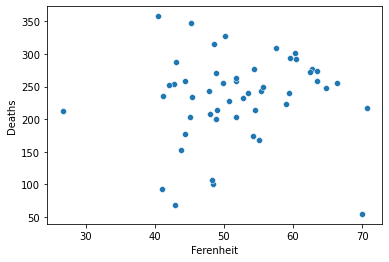

In [45]:
sb.scatterplot(data=combined_data_temp,x = 'Ferenheit' ,y = 'Deaths')

In [46]:
combined_data_temp.corr()

,Deaths,Ferenheit
Deaths,1.000000,0.088166
Ferenheit,0.088166,1.000000


Intercept of Regression 	: b =  [265.12058586]
Coefficients of Regression 	: a =  [[-0.51262024]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.005697485879175179
Mean Squared Error (MSE) 	: 3394.267874779676

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.12587570823520888
Mean Squared Error (MSE) 	: 7152.833698223878



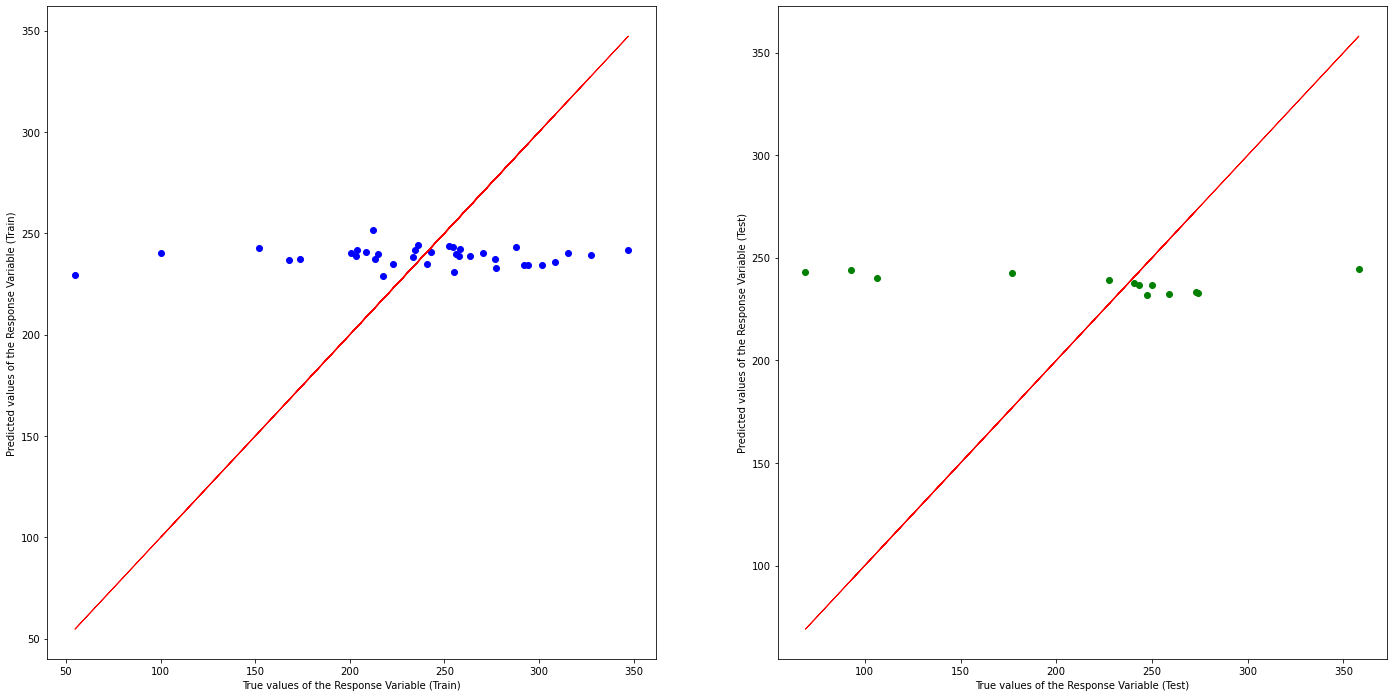

In [47]:
Ferenheit = pd.DataFrame(combined_data_temp['Ferenheit'])   # Response
Deaths = pd.DataFrame(combined_data_temp['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(Ferenheit,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

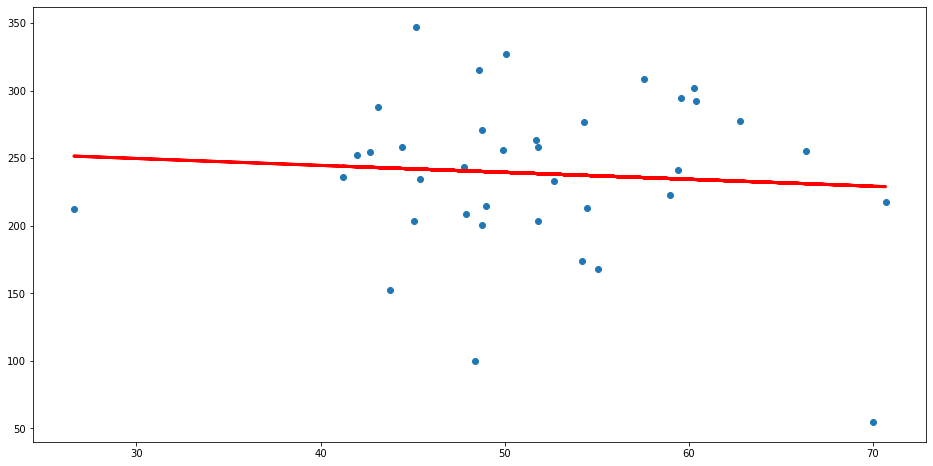

In [48]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate Inpatient Expense

In [49]:
expenses_data = pd.read_csv("expenses_data.csv")
expenses_data = expenses_data.set_index('Location')
expenses_data = expenses_data.rename(columns={"Expenses per Inpatient Day":"expense"})
expenses_data

,expense
Location,
United States,2607
Alabama,1657
Alaska,2397
Arizona,2751
Arkansas,1883
California,3726
Colorado,3047
Connecticut,2884
Delaware,3141


In [50]:
combined_data = state_data.merge(expenses_data, left_index = True, right_index = True)
combined_data = combined_data.rename(columns={0:'Deaths'})
combined_data

,Deaths,expense
Alabama,277.352662,1657
Alaska,211.992483,2397
Arizona,301.695057,2751
Arkansas,292.028898,1883
California,241.007448,3726
Colorado,203.694428,3047
Connecticut,214.787380,2884
Delaware,243.208159,3141
Florida,217.408189,2366
Georgia,258.916489,1939


<AxesSubplot:xlabel='expense', ylabel='Deaths'>

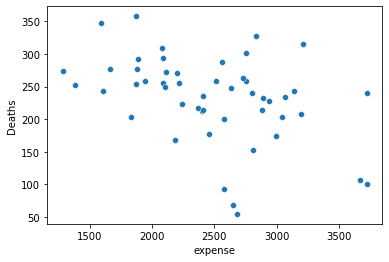

In [51]:
sb.scatterplot(data=combined_data,x = 'expense' ,y = 'Deaths')

In [52]:
combined_data.corr()

,Deaths,expense
Deaths,1.000000,-0.419157
expense,-0.419157,1.000000


Intercept of Regression 	: b =  [366.65784834]
Coefficients of Regression 	: a =  [[-0.05276556]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19340494761121307
Mean Squared Error (MSE) 	: 3032.20190799517

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.12637892304823084
Mean Squared Error (MSE) 	: 4981.437196348093



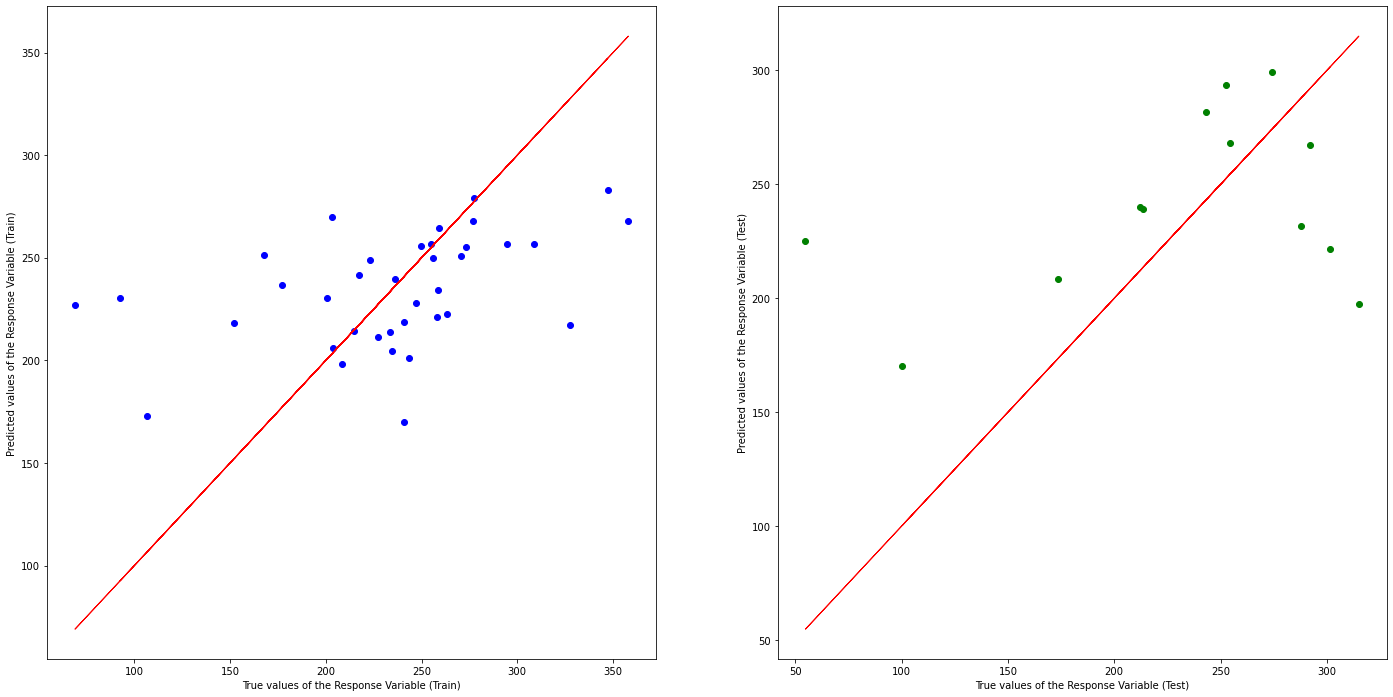

In [53]:
expense = pd.DataFrame(combined_data['expense'])   # Response
Deaths = pd.DataFrame(combined_data['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(expense,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

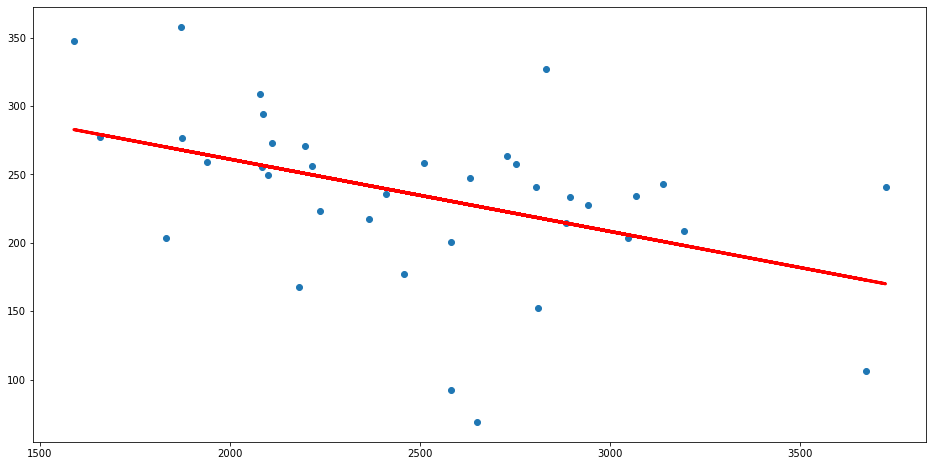

In [54]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate Demographic

In [55]:
age_data = pd.read_csv("age_data.csv")
age_data = age_data.set_index('Location')
age_data

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
Location,,,,,,,
United States,0.236,0.087,0.125,0.255,0.132,0.165,1
Alabama,0.237,0.087,0.115,0.251,0.135,0.175,1
Alaska,0.259,0.093,0.139,0.246,0.132,0.130,1
Arizona,0.240,0.093,0.121,0.241,0.124,0.182,1
Arkansas,0.247,0.087,0.115,0.248,0.131,0.173,1
California,0.237,0.092,0.137,0.263,0.123,0.149,1
Colorado,0.231,0.089,0.141,0.265,0.126,0.148,1
Connecticut,0.217,0.086,0.113,0.259,0.148,0.177,1
Delaware,0.218,0.081,0.118,0.242,0.144,0.197,1


In [56]:
combined_data = state_data.merge(age_data, left_index = True, right_index = True)
combined_data = combined_data.rename(columns={0:'Deaths'})
combined_data

,Deaths,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
Alabama,277.352662,0.237,0.087,0.115,0.251,0.135,0.175,1
Alaska,211.992483,0.259,0.093,0.139,0.246,0.132,0.130,1
Arizona,301.695057,0.240,0.093,0.121,0.241,0.124,0.182,1
Arkansas,292.028898,0.247,0.087,0.115,0.248,0.131,0.173,1
California,241.007448,0.237,0.092,0.137,0.263,0.123,0.149,1
Colorado,203.694428,0.231,0.089,0.141,0.265,0.126,0.148,1
Connecticut,214.787380,0.217,0.086,0.113,0.259,0.148,0.177,1
Delaware,243.208159,0.218,0.081,0.118,0.242,0.144,0.197,1
Florida,217.408189,0.209,0.080,0.114,0.249,0.137,0.211,1
Georgia,258.916489,0.253,0.089,0.122,0.267,0.125,0.145,1


<AxesSubplot:xlabel='Children 0-18', ylabel='Deaths'>

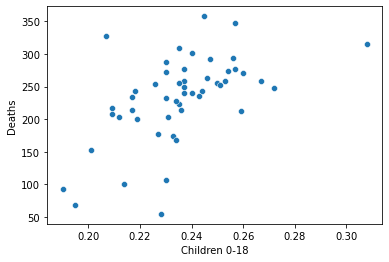

In [57]:
sb.scatterplot(data=combined_data,x = 'Children 0-18' ,y = 'Deaths')

<AxesSubplot:xlabel='Adults 19-25', ylabel='Deaths'>

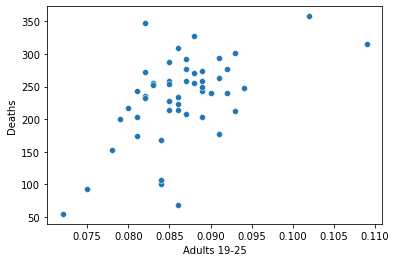

In [58]:
sb.scatterplot(data=combined_data,x = 'Adults 19-25' ,y = 'Deaths')

<AxesSubplot:xlabel='Adults 26-34', ylabel='Deaths'>

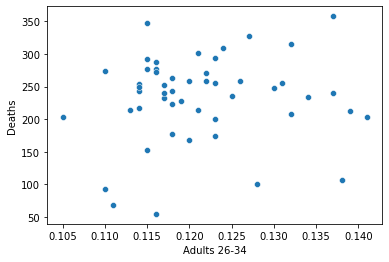

In [59]:
sb.scatterplot(data=combined_data,x = 'Adults 26-34' ,y = 'Deaths')

<AxesSubplot:xlabel='Adults 35-54', ylabel='Deaths'>

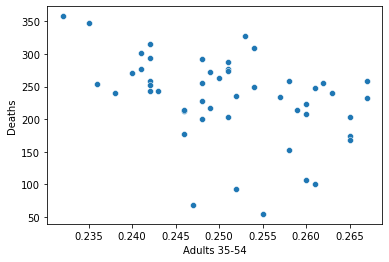

In [60]:
sb.scatterplot(data=combined_data,x = 'Adults 35-54' ,y = 'Deaths')

<AxesSubplot:xlabel='Adults 55-64', ylabel='Deaths'>

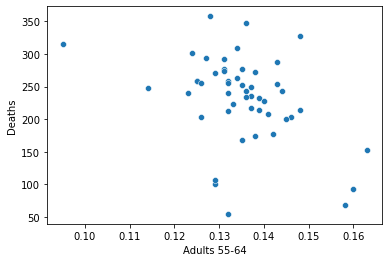

In [61]:
sb.scatterplot(data=combined_data,x = 'Adults 55-64' ,y = 'Deaths')

<AxesSubplot:xlabel='65+', ylabel='Deaths'>

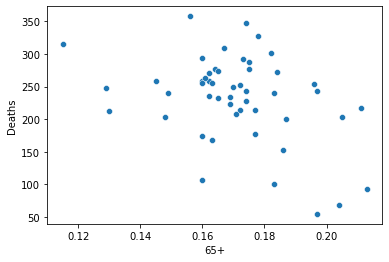

In [62]:
sb.scatterplot(data=combined_data,x = '65+' ,y = 'Deaths')

In [63]:
combined_data.corr()

,Deaths,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
Deaths,1.000000,0.553862,0.544574,0.095460,-0.412356,-0.401867,-0.390912,NaN
Children 0-18,0.553862,1.000000,0.644512,0.249457,-0.291626,-0.834127,-0.777154,NaN
Adults 19-25,0.544574,0.644512,1.000000,0.435012,-0.276112,-0.654767,-0.691184,NaN
Adults 26-34,0.095460,0.249457,0.435012,1.000000,0.246643,-0.513557,-0.662831,NaN
Adults 35-54,-0.412356,-0.291626,-0.276112,0.246643,1.000000,0.028506,-0.183161,NaN
Adults 55-64,-0.401867,-0.834127,-0.654767,-0.513557,0.028506,1.000000,0.745593,NaN
65+,-0.390912,-0.777154,-0.691184,-0.662831,-0.183161,0.745593,1.000000,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Intercept of Regression 	: b =  [-339.58479207]
Coefficients of Regression 	: a =  [[2468.99013738]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5229523810691048
Mean Squared Error (MSE) 	: 1904.3652315409622

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.4199437333539686
Mean Squared Error (MSE) 	: 7144.784745401064



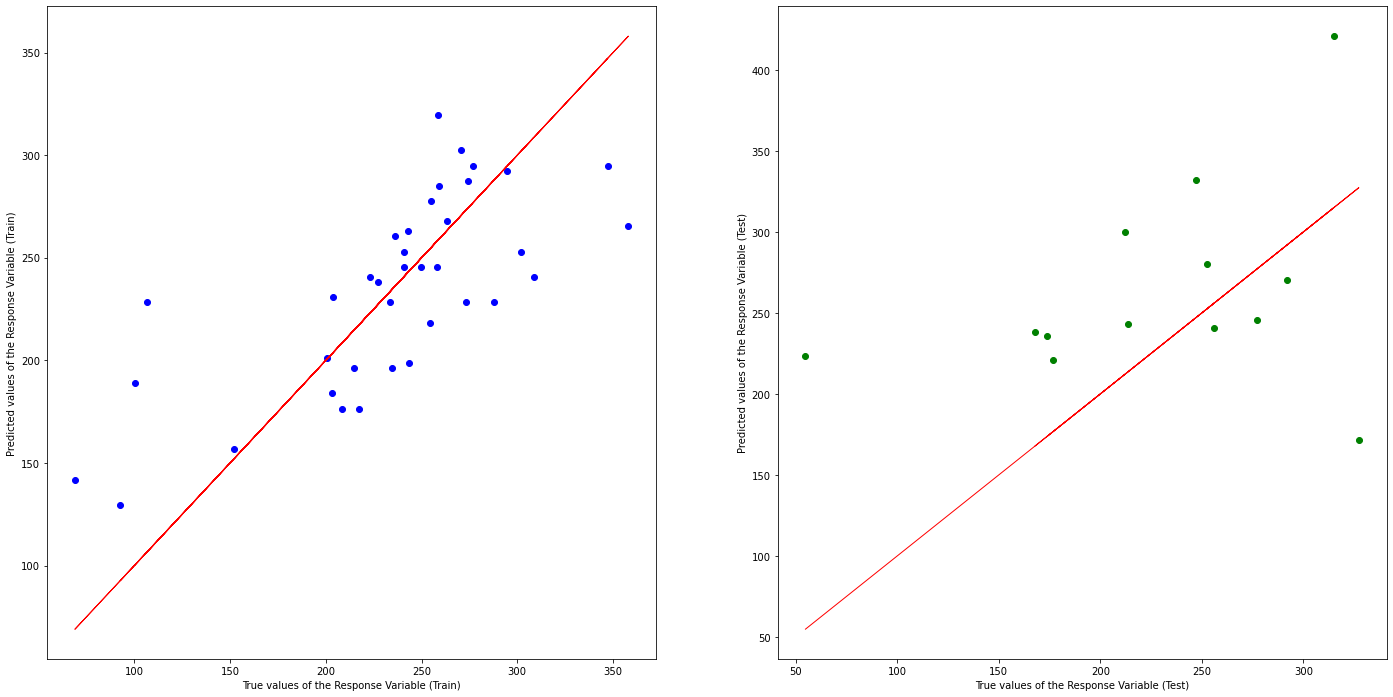

In [64]:
numberChildren = pd.DataFrame(combined_data['Children 0-18'])   # Response
Deaths = pd.DataFrame(combined_data['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(numberChildren,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

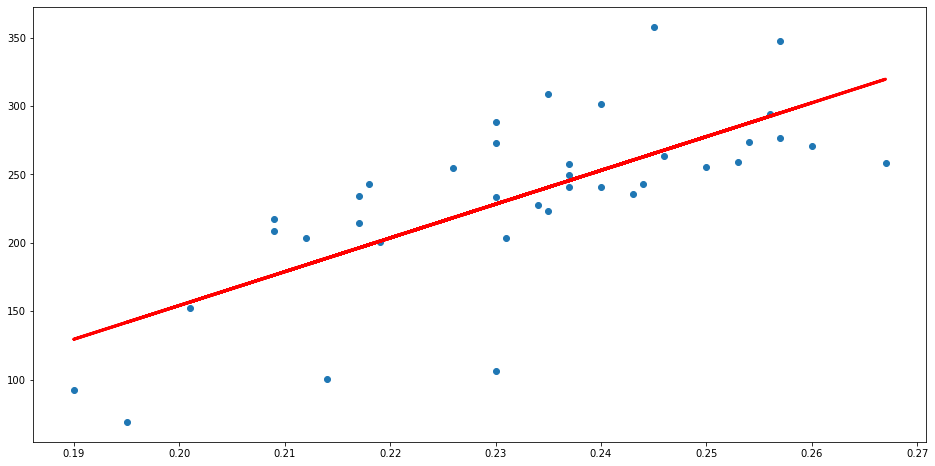

In [65]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate GDP

# Multi-Variate for all Values